<a href="https://colab.research.google.com/github/JayParihar2110/Data-Science-and-Machine-Learning-Projects/blob/main/Finance_Project_US_Banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)


In [5]:
import pandas_datareader.data as web
import datetime

In [6]:
import yfinance as yf

In [7]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [8]:
data_dict = {}
for ticker in tickers:
    data_dict[ticker] = yf.download(ticker, start=start, end=end)


/tmp/ipython-input-3801994022.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_dict[ticker] = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3801994022.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_dict[ticker] = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3801994022.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_dict[ticker] = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3801994022.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_dict[ticker] = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython

In [9]:
BAC = data_dict["BAC"]
C = data_dict["C"]
GS = data_dict["GS"]
JPM = data_dict["JPM"]
MS = data_dict["MS"]
WFC = data_dict["WFC"]

In [10]:
print(BAC.head())

Price           Close       High        Low       Open    Volume
Ticker            BAC        BAC        BAC        BAC       BAC
Date                                                            
2006-01-03  30.991055  31.056880  30.378869  30.885730  16296700
2006-01-04  30.661909  31.096363  30.576334  30.938379  17757900
2006-01-05  30.701405  30.826476  30.490760  30.661910  14970700
2006-01-06  30.655331  30.879140  30.510512  30.806731  12599800
2006-01-09  30.675074  30.918633  30.517092  30.754067  15619400


In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [12]:
closing_prices = bank_stocks.xs('Close', axis=1, level=1)

In [13]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  30.991055  31.056880  30.378869  30.885730  16296700  319.342529   
2006-01-04  30.661909  31.096363  30.576334  30.938379  17757900  313.446747   
2006-01-05  30.701405  30.826476  30.490760  30.661910  14970700  315.001617   
2006-01-06  30.655331  30.879140  30.510512  30.806731  12599800  315.001617   
2006-01-09  30.675074  30.918633  30.517092  30.754067  15619400  313.511536   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  319.925622  311.697494  317.463667  1537600  ...  31.714354   
2006-01-04  318.111527  313.252389  316.556607  1870960  ...  31.736118   
2006-01-05  316.038217  313.576263  313.835413  1143160  ...  31.823128   
2006-01-06  316.815687  312.280493  316.686102  1370210  ...  31.855759   
2006-01-09  315.779133  312.928443  314.872098  1680740  ...  32.192970   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  31.812254  30.860443  31.094315  5377000  18.566580  18.610232   
2006-01-04  32.241938  31.736118  31.926482  7977800  18.351227  18.520013   
2006-01-05  31.866640  31.556622  31.844884  5778000  18.330862  18.365783   
2006-01-06  32.008048  31.572935  31.964537  6889800  18.438532  18.493824   
2006-01-09  32.247361  31.882952  31.888392  4144500  18.435629  18.522933   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.156253  18.391973  11016400  
2006-01-04  18.255192  18.508373  10870000  
2006-01-05  18.223187  18.333772  10158000  
2006-01-06  18.266835  18.380329   8403800  
2006-01-09  18.365787  18.435629   5619600  

[5 rows x 30 columns]

In [15]:
close_df = bank_stocks.xs(key='Close', axis=1, level=1)



In [17]:
print(close_df.max())

     Ticker
BAC  BAC        37.478714
C    C         380.724335
GS   GS        185.153244
JPM  JPM        53.346737
MS   MS         49.715775
WFC  WFC        43.769444
dtype: float64


In [18]:
returns = pd.DataFrame()

In [19]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013813,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004730,0.012030,0.016242,0.010586,-0.000157


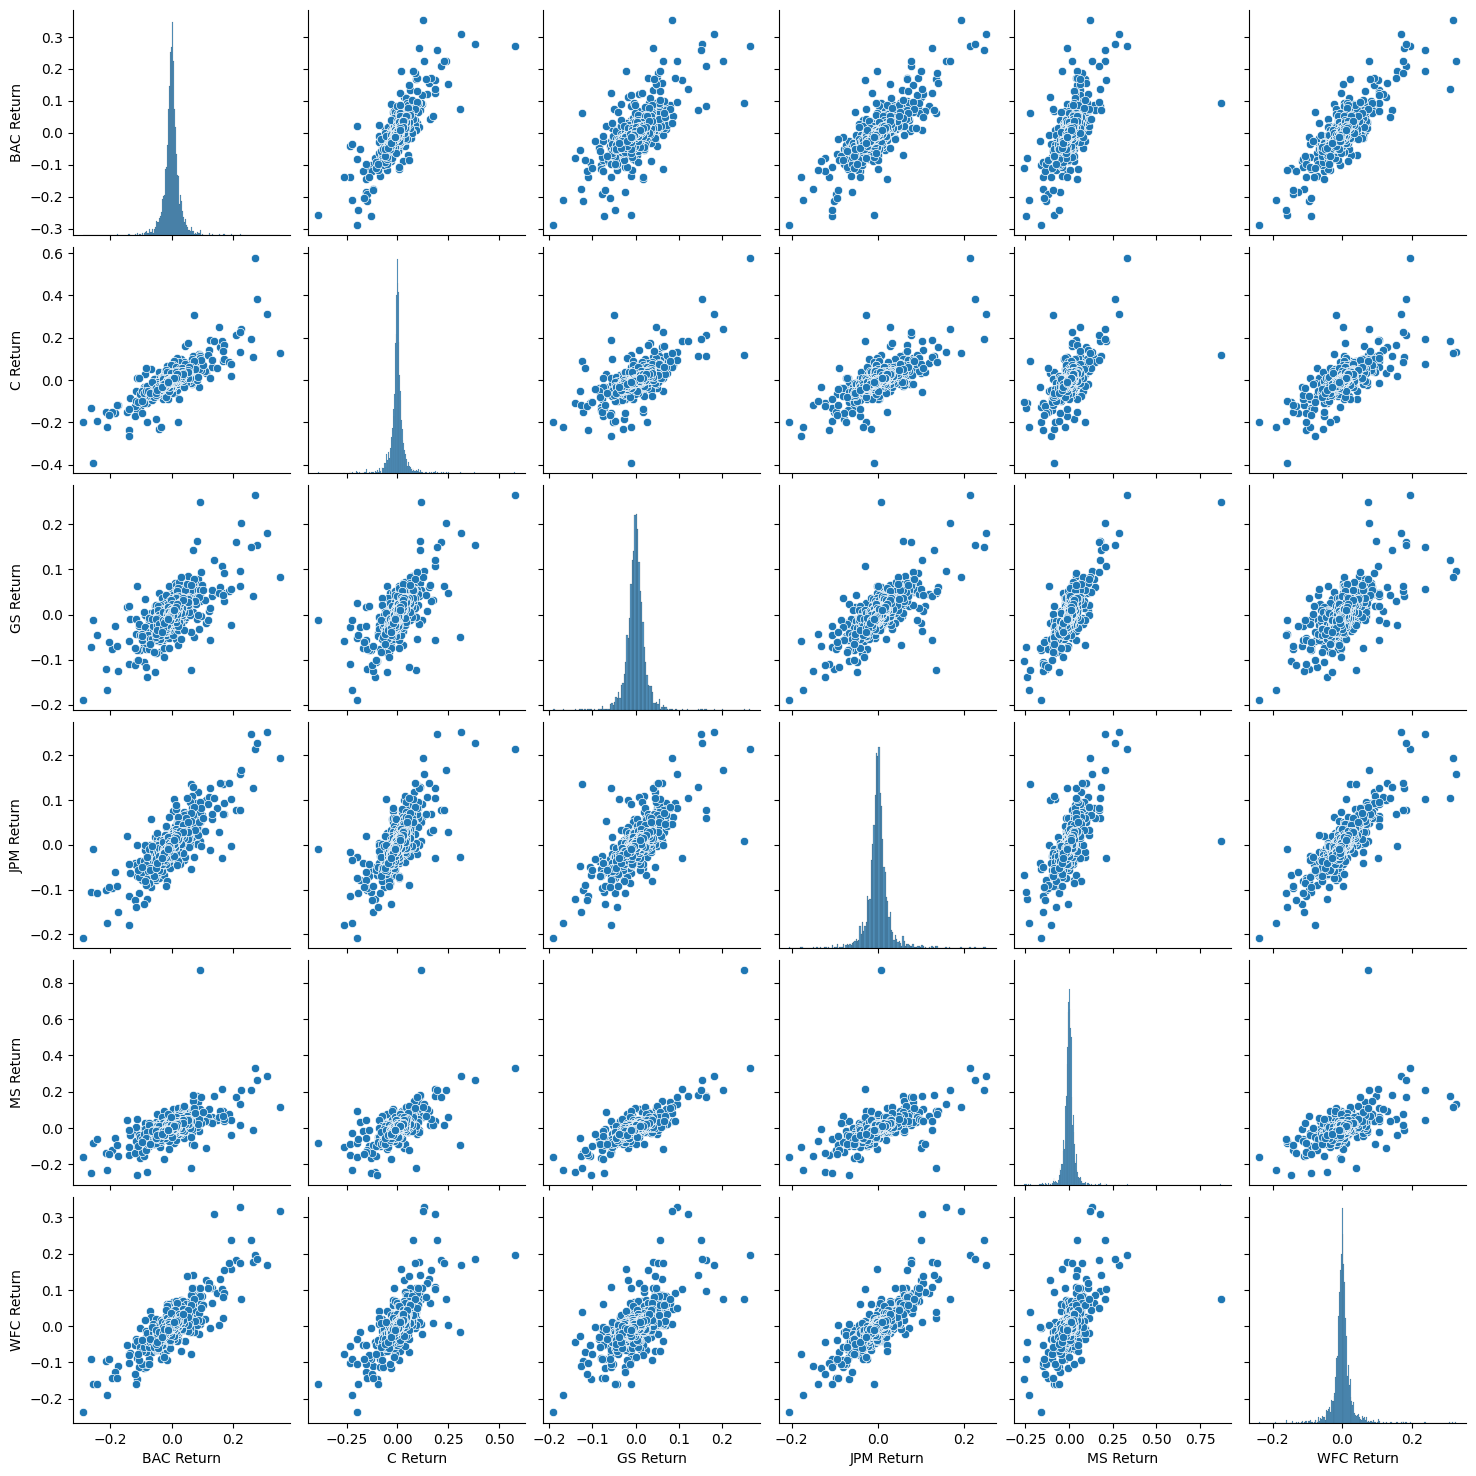

In [20]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [21]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

,0
BAC Return,2009-01-20
C Return,2009-02-27
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


In [22]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2008-11-24
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


In [23]:
returns.std() # Citigroup riskiest

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


In [25]:
returns.loc['2015-01-01':'2015-12-31'].std()


,0
BAC Return,0.016174
C Return,0.015288
GS Return,0.014043
JPM Return,0.014006
MS Return,0.016287
WFC Return,0.012552


<Axes: xlabel='MS Return', ylabel='Count'>

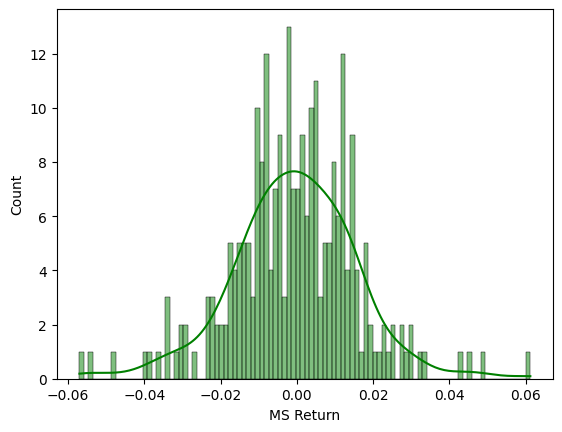

In [27]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31', 'MS Return'], color='green', bins=100, kde=True)


<Axes: xlabel='C Return', ylabel='Count'>

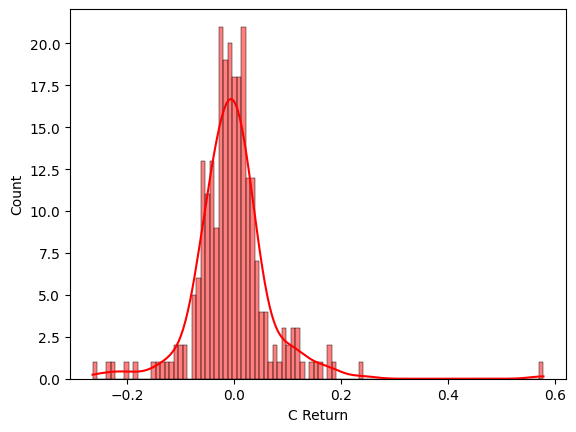

In [29]:
sns.histplot(
    returns.loc['2008-01-01':'2008-12-31', 'C Return'],
    color='red',
    bins=100,
    kde=True
)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [32]:
data = returns.loc['2008-01-01':'2008-12-31']

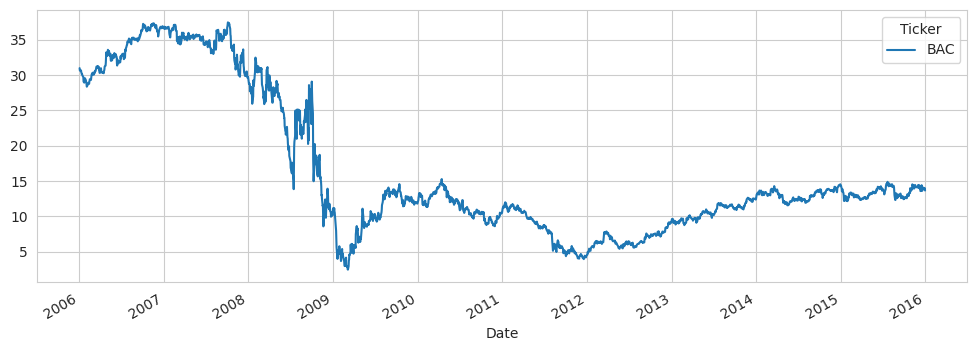

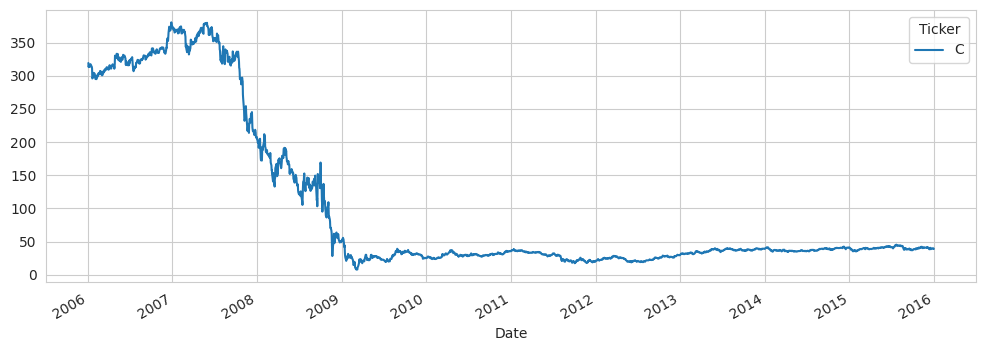

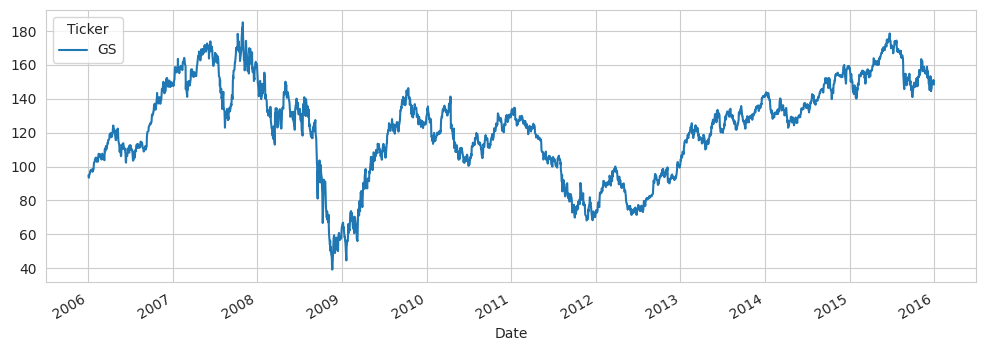

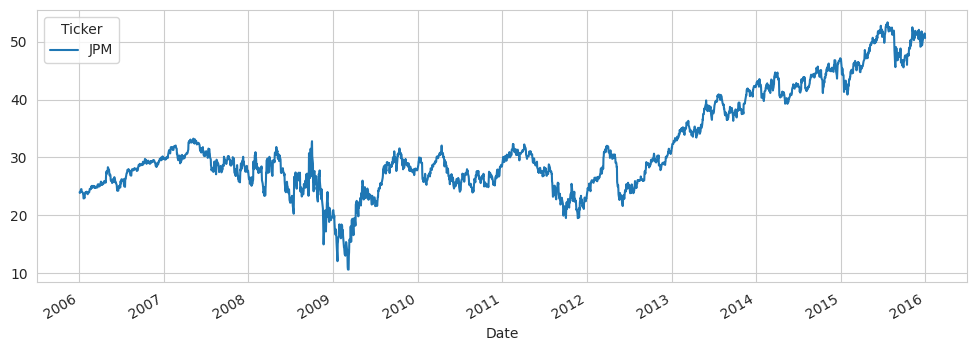

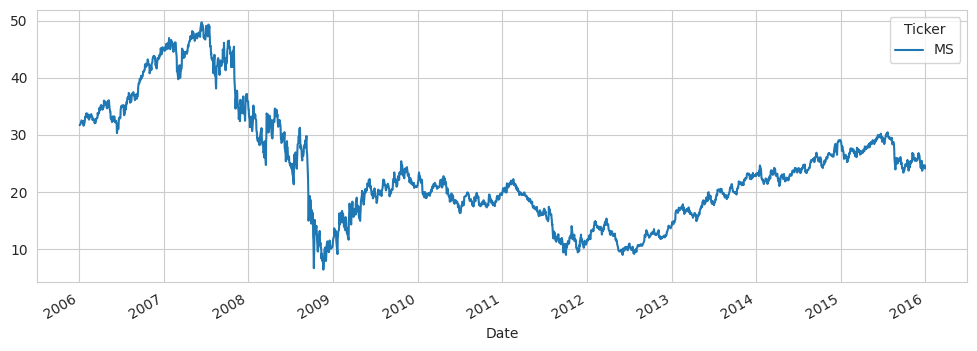

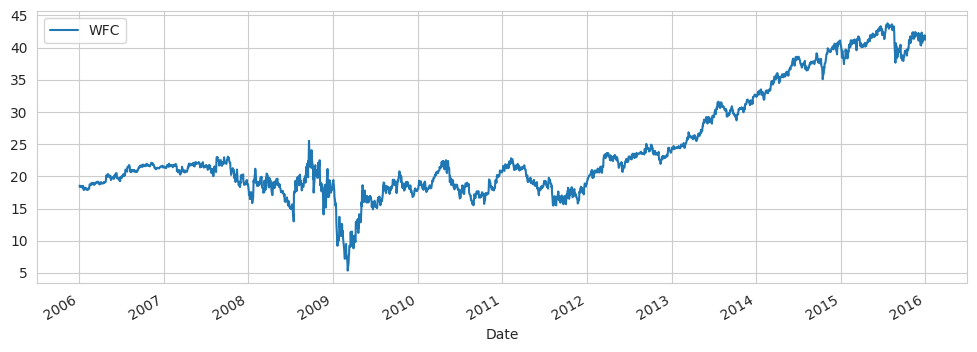

In [35]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

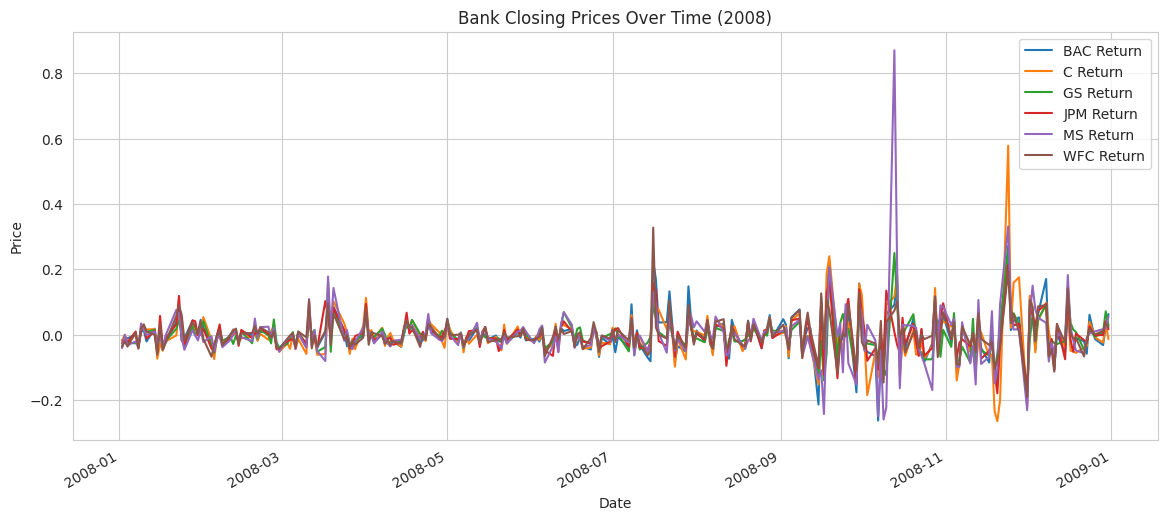

In [40]:
data.plot(figsize=(14,6))
plt.title("Bank Closing Prices Over Time (2008)")
plt.ylabel("Price")
plt.show()

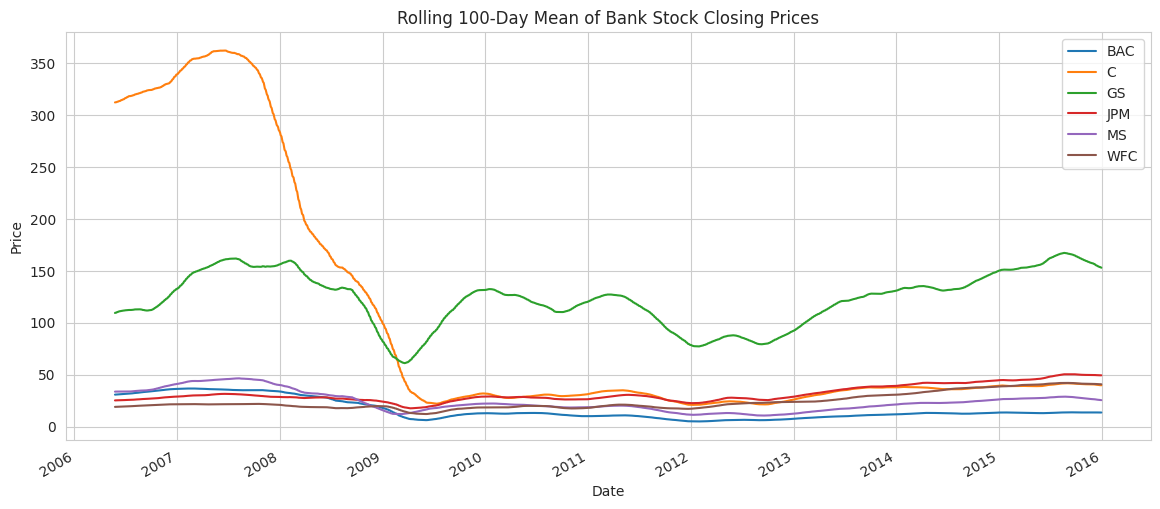

In [44]:
rolling_mean_100 = bank_stocks.xs('Close', axis=1, level=1).rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(14, 6))

for tick in tickers:
    rolling_mean_100[tick].plot(ax=ax, label=tick)

ax.legend()
ax.set_title("Rolling 100-Day Mean of Bank Stock Closing Prices")
ax.set_ylabel("Price")
plt.show()

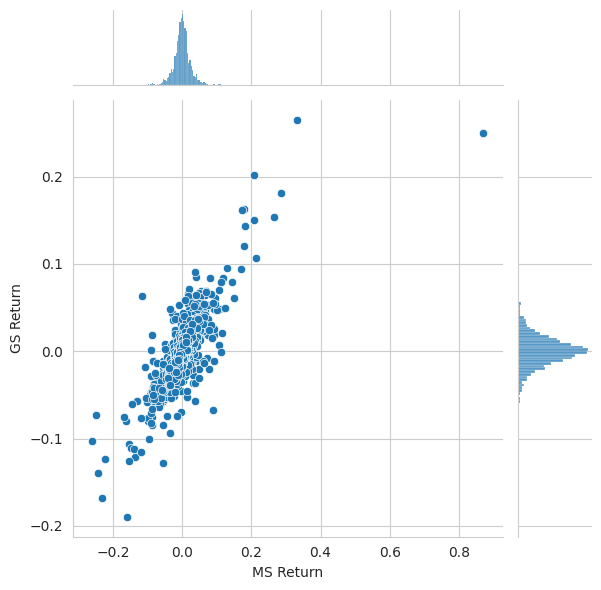

In [45]:
sns.jointplot(x='MS Return', y='GS Return', data=returns, kind='scatter')

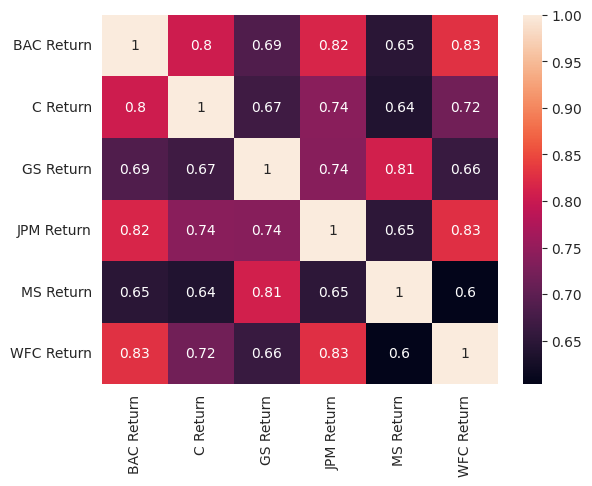

In [46]:
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

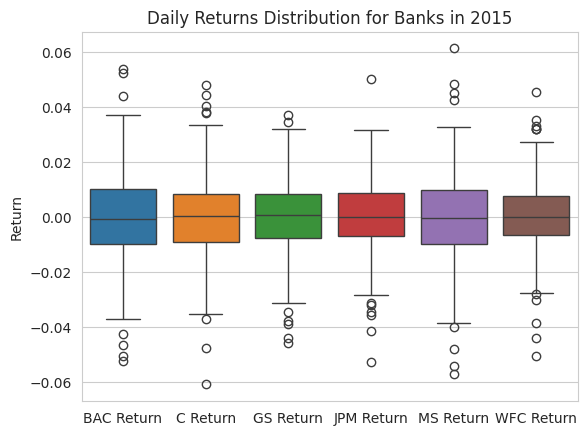

Standard Deviation of Daily Returns in 2015:
BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64


In [47]:
returns_2015 = returns.loc['2015-01-01':'2015-12-31']
sns.boxplot(data=returns_2015)
plt.title("Daily Returns Distribution for Banks in 2015")
plt.ylabel("Return")
plt.show()

std_2015 = returns_2015.std()
print("Standard Deviation of Daily Returns in 2015:")
print(std_2015)

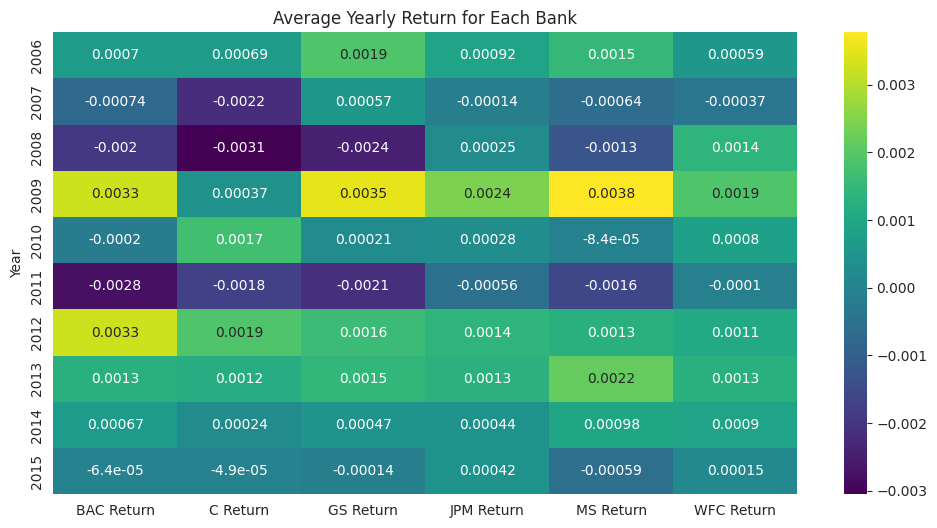

In [48]:
returns['Year'] = returns.index.year
yearly_avg_returns = returns.groupby('Year').mean()
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_avg_returns, annot=True, cmap='viridis')
plt.title('Average Yearly Return for Each Bank')
plt.show()